In [16]:
import inspect
from scipy.stats import expon
from scipy.stats import weibull_min
from scipy.stats import lognorm
from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import invgamma
from scipy.stats import fisk
from scipy.stats import johnsonsb
from scipy.stats import gamma
from scipy.stats import uniform

# 1. uniform:
print(inspect.getsource(uniform._pdf))

# 2. exponential 
print(inspect.getsource(expon._pdf))

# 3. gamma:
print(inspect.getsource(gamma._pdf))

# 4. weibull
print(inspect.getsource(weibull_min._pdf))

# 5.  normal:
print(inspect.getsource(norm._pdf))

# 6. lognormal 
print(inspect.getsource(lognorm._pdf))

# 7. beta
print(inspect.getsource(beta._pdf))

# 8. pearson
print(inspect.getsource(invgamma._pdf))

# 9. log logistics:
print(inspect.getsource(fisk._pdf))

# 10. johnsonb
print(inspect.getsource(johnsonsb._pdf))


    def _pdf(self, x):
        return 1.0*(x == x)

    def _pdf(self, x):
        # expon.pdf(x) = exp(-x)
        return np.exp(-x)

    def _pdf(self, x, a):
        # gamma.pdf(x, a) = x**(a-1) * exp(-x) / gamma(a)
        return np.exp(self._logpdf(x, a))

    def _pdf(self, x, c):
        # weibull_min.pdf(x, c) = c * x**(c-1) * exp(-x**c)
        return c*pow(x, c-1)*np.exp(-pow(x, c))

    def _pdf(self, x):
        # norm.pdf(x) = exp(-x**2/2)/sqrt(2*pi)
        return _norm_pdf(x)

    def _pdf(self, x, s):
        # lognorm.pdf(x, s) = 1 / (s*x*sqrt(2*pi)) * exp(-1/2*(log(x)/s)**2)
        return np.exp(self._logpdf(x, s))

    def _pdf(self, x, a, b):
        #                     gamma(a+b) * x**(a-1) * (1-x)**(b-1)
        # beta.pdf(x, a, b) = ------------------------------------
        #                              gamma(a)*gamma(b)
        with np.errstate(over='ignore'):
            return scu._beta_pdf(x, a, b)

    def _pdf(self, x, a):
        # invgamma.pdf(x, a

In [ ]:

# public: 
print(inspect.getsource(fisk.pdf))

    def pdf(self, x, *args, **kwds):
        """Probability density function at x of the given RV.

        Parameters
        ----------
        x : array_like
            quantiles
        arg1, arg2, arg3,... : array_like
            The shape parameter(s) for the distribution (see docstring of the
            instance object for more information)
        loc : array_like, optional
            location parameter (default=0)
        scale : array_like, optional
            scale parameter (default=1)

        Returns
        -------
        pdf : ndarray
            Probability density function evaluated at x

        """
        args, loc, scale = self._parse_args(*args, **kwds)
        x, loc, scale = map(asarray, (x, loc, scale))
        args = tuple(map(asarray, args))
        dtyp = np.promote_types(x.dtype, np.float64)
        x = np.asarray((x - loc)/scale, dtype=dtyp)
        cond0 = self._argcheck(*args) & (scale > 0)
        cond1 = self._support_mask(x, *args) & (scale > 0




## Beta Distribution Formula: 

বইয়ের PDF:


$f(x)=\frac{x^{a-1}(1-x)^{b-1}}{B(a,b)}$

এখন (B(a,b)) বসাও:


$f(x)$ =
$\frac{x^{a-1}(1-x)^{b-1}}{\frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}}$
=================================================================

$\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}
x^{a-1}(1-x)^{b-1}$

🔥 **এইটাই SciPy formula**



<br>
<br>

## Log-Logistics:

Scipy's `fisk` distribution is defined for $x > 0$  and:

$\text{fisk.pdf}(x, c) = c \cdot x^{-c-1} (1 + x^{-c})^{-2}$

If we let $y = x/\beta$ in your book's formula, and set $\alpha = c$, we get:

$f(y) = \frac{c (y)^{c-1}}{[1 + y^{c}]^2}$

But scipy has $(x^{-c-1}$ while your book has $x^{c-1}$ . This suggests:
$\text{scipy's } c = \text{book's } \alpha$

and the formulas would match if we substitute \(x \to 1/x\) in one of them.

Actually, the log-logistic distribution has the property that if $X \sim \text{LogLogistic}(\alpha, \beta)$ , then $1/X \sim \text{LogLogistic}(\alpha, 1/\beta)$. So there are different conventions.




<br>
<br>

# `#02: Discreate Random Variable`

<br>
<br>

In [54]:
import inspect
from scipy.stats import bernoulli
from scipy.stats import randint
from scipy.stats import binom
from scipy.stats import poisson


# Bernoulli Distribution: 
print(inspect.getsource(bernoulli._pmf))

# Discreate uniform
print(inspect.getsource(randint._pmf))

# Binomial
print(inspect.getsource(binom._pmf))

# Poisson:
print(inspect.getsource(poisson._pmf))

    def _pmf(self, x, p):
        # bernoulli.pmf(k) = 1-p  if k = 0
        #                  = p    if k = 1
        return binom._pmf(x, 1, p)

    def _pmf(self, k, low, high):
        # randint.pmf(k) = 1./(high - low)
        p = np.ones_like(k) / (np.asarray(high, dtype=np.int64) - low)
        return np.where((k >= low) & (k < high), p, 0.)

    def _pmf(self, x, n, p):
        # binom.pmf(k) = choose(n, k) * p**k * (1-p)**(n-k)
        return scu._binom_pmf(x, n, p)

    def _pmf(self, k, mu):
        # poisson.pmf(k) = exp(-mu) * mu**k / k!
        return exp(self._logpmf(k, mu))



In [22]:
import numpy as np 
np.random.randint(0,2,500)

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

0.52


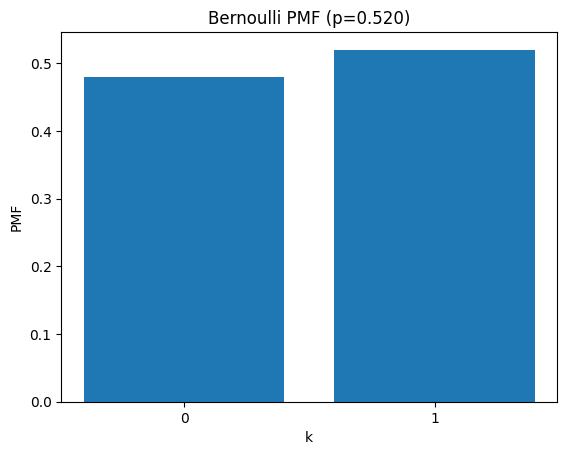

In [147]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as stats 

x = np.random.randint(0,2,100)

print(x.mean())

# Success rate: 
p = x.mean()

# compute pmf for outcomes 0 and 1
vals = np.array([0, 1])
pmf_vals = stats.bernoulli.pmf(vals, p)

# plot as a bar chart (PMF is defined only at 0 and 1)
plt.bar(vals, pmf_vals)
plt.xticks(vals)
plt.xlabel('k')
plt.ylabel('PMF')
plt.title(f'Bernoulli PMF (p={p:.3f})')
plt.show()



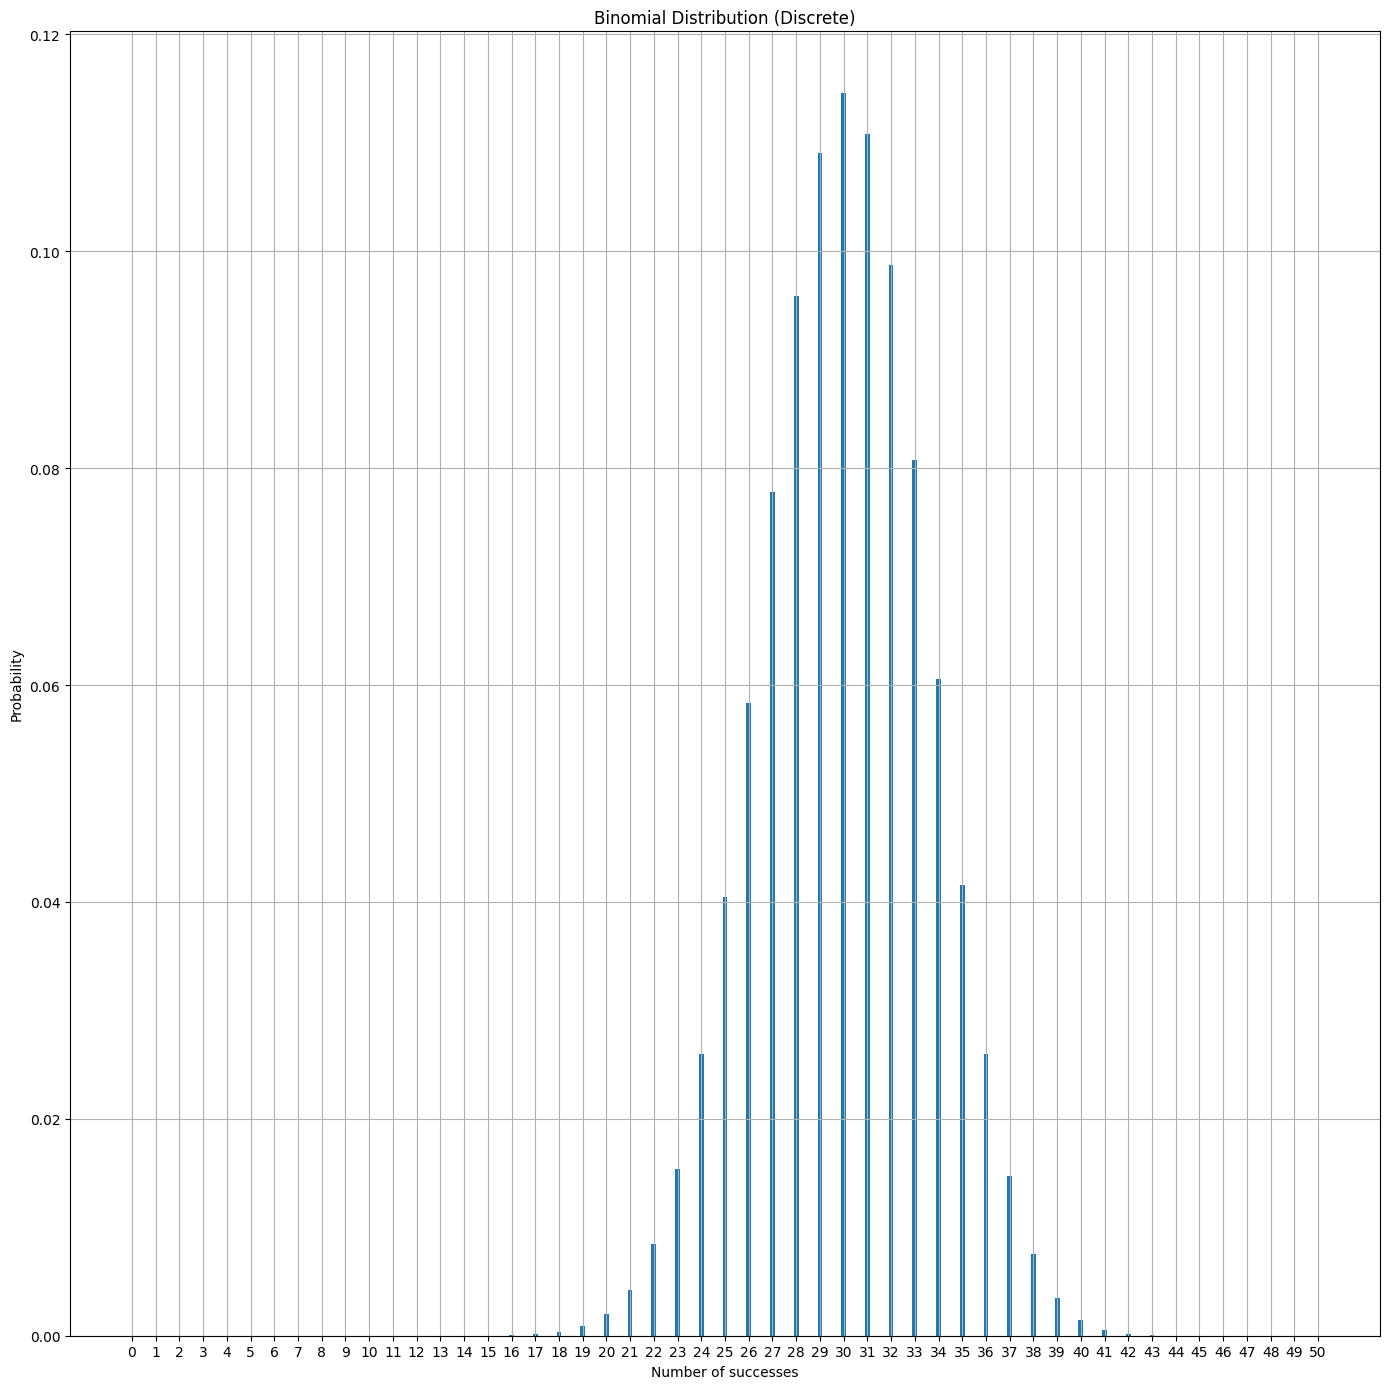

In [ ]:


# binomial distribution:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# total trails
# 50 bar toss korle koita Head aste pare:
# 0ta head, 1ta head, 2ta head ..... 50 ta head === total = 51 possible outcome
# That's why, (0~51)
n = 50        

#
# ekta single trial e: probability of success or head: 
#
p = 0.6      


# ----------------------
# 50*0.6 = 30 in average. 
# 30 ta head aste pare.
# ----------------------


# integer successes
x = np.arange(0, n+1)   


y = binom.pmf(x, n, p)

plt.figure(figsize=(14,14))
plt.bar(x, y, width=0.2)
plt.xlabel("Number of successes")
plt.ylabel("Probability")
plt.title("Binomial Distribution (Discrete)")
plt.xticks([i for i in range(0,51)])
plt.grid(True)
plt.tight_layout()
plt.show()

# """ 
# thole emon vabe bolte pari je: toss koin korle: jodi, single trail e head 60% tail 40% hoi then, 
# 50 bar ei expriment try korle, 26 bar head assar probability 0.04, then 27 bar = 0.006 eibbe 
# 30=0.11 then 31 abar kom, 32 aro kom amar graph eiTai show korte se.
# """



In [13]:
import numpy as np 
np.arange(0,20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

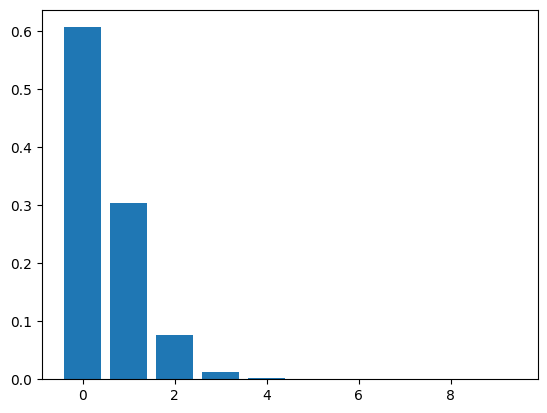

In [19]:

# poission distribution:
import scipy.stats as stats 
import matplotlib.pyplot as plt 

x = np.arange(0,10)
value_of_lamda = 0.5
y = stats.poisson.pmf(x,value_of_lamda)
plt.bar(x,y)
plt.show()
